In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
965,ham,Or better still can you catch her and let ask ...,NaN,NaN,NaN
4566,ham,But you were together so you should be thinkin...,NaN,NaN,NaN
4274,ham,Haiyoh... Maybe your hamster was jealous of mi...,NaN,NaN,NaN
3475,ham,"I can probably come by, everybody's done aroun...",NaN,NaN,NaN
2746,ham,K da:)how many page you want?,NaN,NaN,NaN


In [4]:
df.shape #more than 5000 sms each having 5 columns

(5572, 5)

In [5]:
#1. Data cleaning (removing nan, missing values etc)
#2. EDA
#3. Text Preprocessing(vectorization,removing stop words, stemming etc)
#4. Model building
#5. Evaluation
#6. Improvement
#7. Website
#8. Deploy


## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
2054,ham,Y so late but i need to go n get da laptop...
5298,ham,I.ll hand her my phone to chat wit u
5127,ham,Cuz ibored. And don wanna study
1166,ham,I am not having her number sir
1710,ham,"(No promises on when though, haven't even gott..."


In [9]:
#renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4492,ham,"LOL .. *grins* .. I'm not babe, but thanks for..."
5261,ham,I absolutely LOVE South Park! I only recently ...
864,ham,Dude ive been seeing a lotta corvettes lately
4402,ham,Just getting back home
735,ham,Then why no one talking to me


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#check for duplicate values
df.duplicated().sum()

403

In [15]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

## 2. EDA

In [18]:
#checking for how many sms are spam and how much are ham
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df.value_counts() #on top of df

target  text                                                                                                                              
0        &lt;#&gt;  in mca. But not conform.                                                                                                  1
        Thats cool. i liked your photos. You are very sexy!                                                                                   1
        That's good, because I need drugs                                                                                                     1
        That's fine, have him give me a call if he knows what he wants or has any questions                                                   1
        That's fine, I'll bitch at you about it later then                                                                                    1
                                                                                                                                             

In [20]:
df['target'].value_counts() #ham are 4516 and spam are 653

target
0    4516
1     653
Name: count, dtype: int64

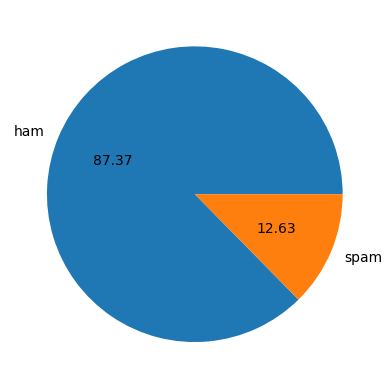

In [21]:
#to better represent we use pychart
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show() #87.37% msgs are not spam and 12.63% messages are spam

In [22]:
#data is imbalanced(slight-spam are less and ham are more)

In [23]:
import nltk

In [24]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\NAMITA
[nltk_data]     SOTI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [25]:
df['num_chars']=df['text'].apply(len)

In [26]:
df.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
#num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head()

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
#num of sentences
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#we can analyze ham and spam seperately
#firstly for ham
df[df['target']==0][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
df[df['target']==1][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
#let's see this through plot(through historgram)
import seaborn as sns

<Axes: xlabel='num_chars', ylabel='Count'>

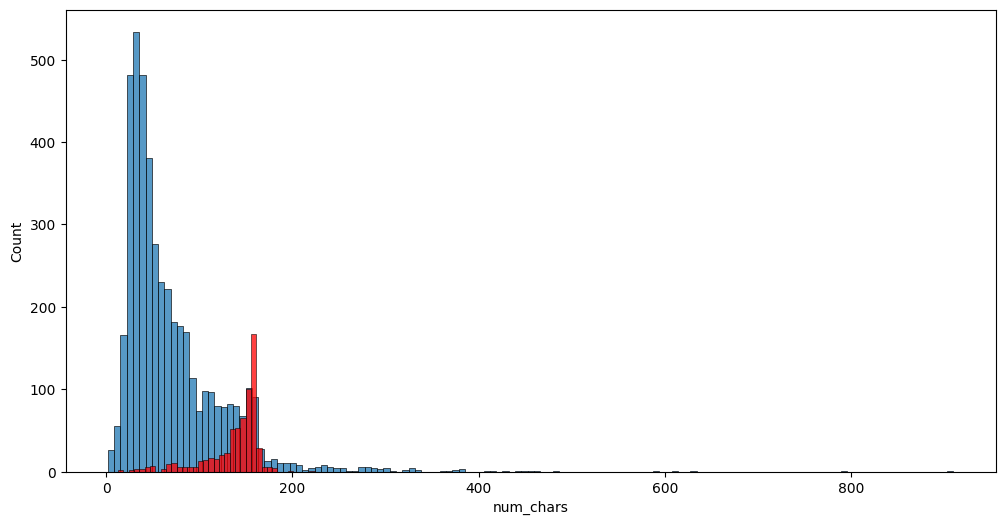

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_chars']) #for hams
sns.histplot(df[df['target']==1]['num_chars'],color='red') #for spams
#most of the ham messages are made of few characters whereas most of the spam messages made from many characters

<Axes: xlabel='num_words', ylabel='Count'>

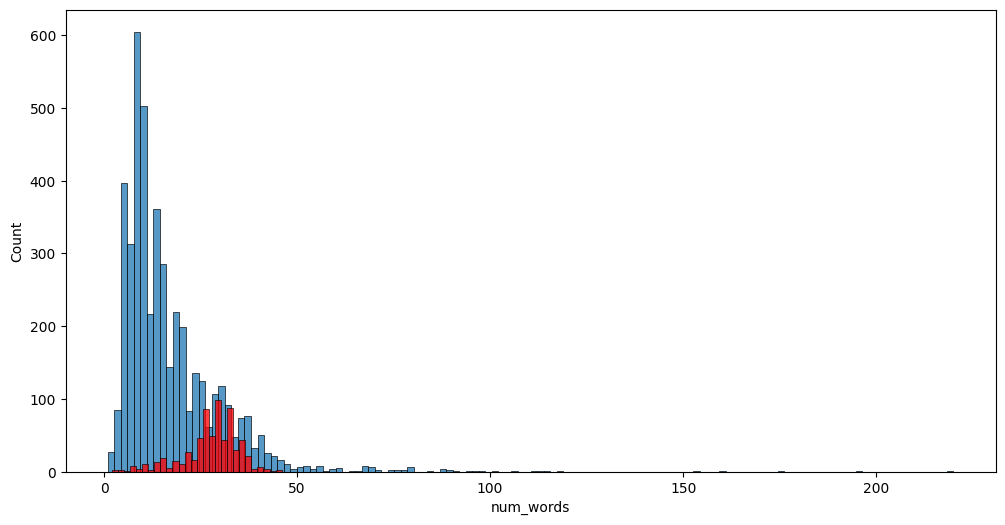

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words']) #for hams
sns.histplot(df[df['target']==1]['num_words'],color='red') #for spams
#similar to the histogram above made for num_chars
#there are some ouliers here like 800,900 chars k bhi ham messages hai and 200-200 words k bhi ham messages hai

<Axes: xlabel='num_sentences', ylabel='Count'>

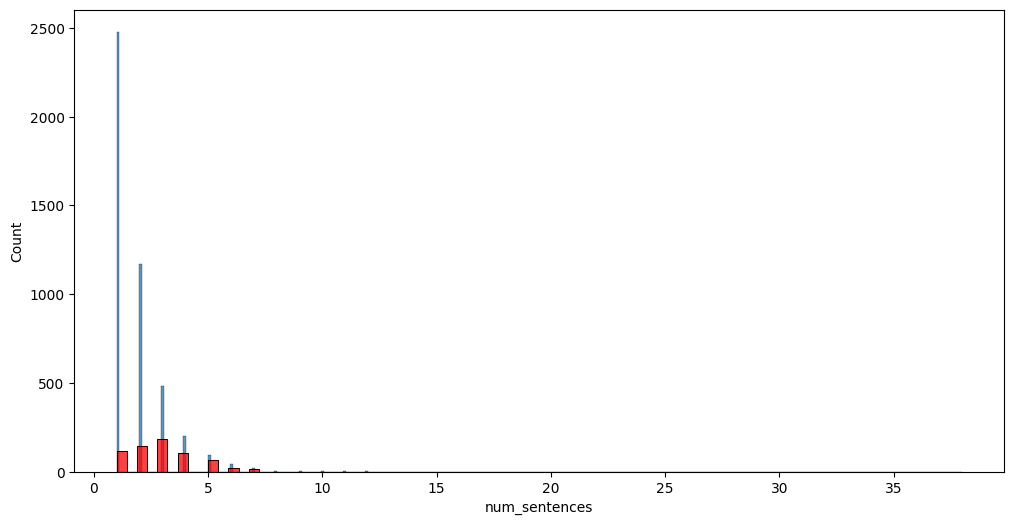

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences']) #for hams
sns.histplot(df[df['target']==1]['num_sentences'],color='red') #for spams

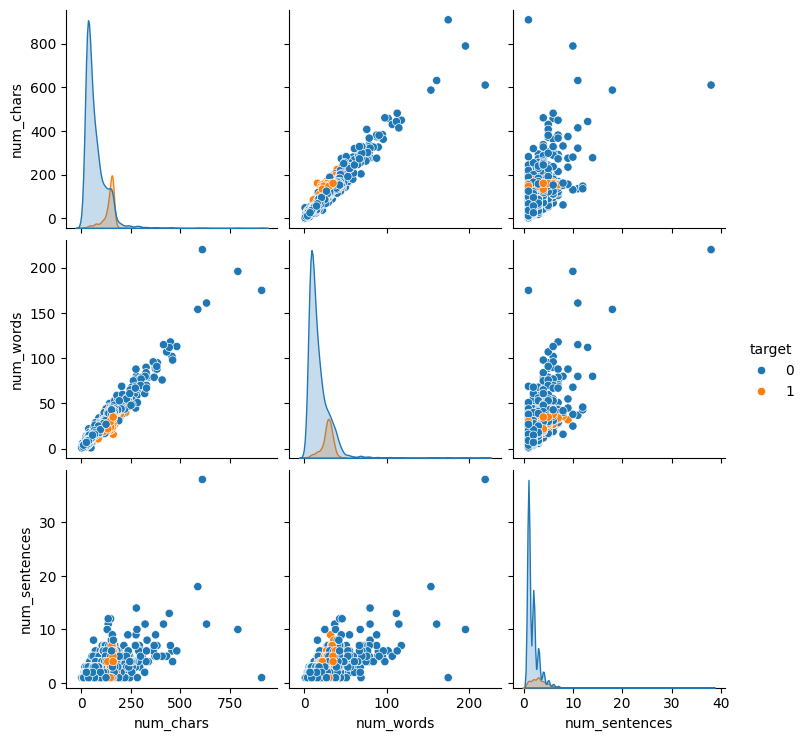

In [38]:
#taking our pearson coefficient 
#we can first see what kind of relationships these cols have with each other (eg: num_words ka num_sentences k sath)
sns.pairplot(df,hue='target')
#there are outliers in the data. These outliers may degrade the analysis

<Axes: >

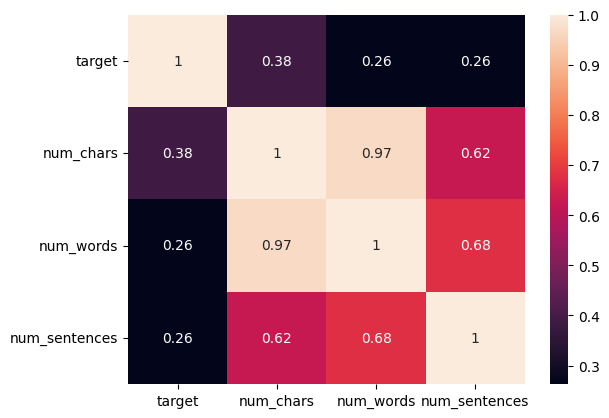

In [39]:
#we can see correlations as well
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)
#it is showing that num_chars p .38 ka relationship hai means jitne zyada chars bdhte hai 1(spam) hone ka tendency bhi bdhta hai
#similarly with num_words is .26 and with num_sentences it is .26
#num_sentences ka num_chars k sath bohot high correlation hai
#num_sentences ka num_words k sath bohot high correlation hai
#num_words ka num_chars k sath bohot high correlation hai
#So this means to make a model, we will take one of the above three correlations, obviously we will take num_chars because with num_words it is the highest and also the variation of num_chars with target if .38(highest)

In [40]:
#now we will the number of top words used in both ham and spam

## 3. Data/Text Preprocessing
3.1 Lower Case
3.2 Tokenization
3.3 Removing special chars
3.4 Removing stop words and punctuation
3.5 Stemming

In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\NAMITA
[nltk_data]     SOTI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [43]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')#brings the word down to its root word

'love'

In [45]:
#the following function will perform all the above stated steps in one function only
def transform_text(text):
    text=text.lower() #3.1
    text=nltk.word_tokenize(text) #3.2
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)
    
    # return text
    #1.transform
    #2.vectorize
    #3.apply algo

In [46]:
# transform_text('Hi, how are you %% eg')
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...') #STOP WORDS REMOVED

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [47]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [48]:
#word cloud print kr k dekhege ye dekhne k liye ki konse words zyada use hore spams mei or hams mei
#word cloud jo sabse imp words hai unko bada kr k dikhayega

In [49]:
#we are making a new col
df['transformed_text']=df['text'].apply(transform_text)

In [50]:
df.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
%pip install wordcloud


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
#first we will generate the word cloud of spam messages
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [53]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=""))

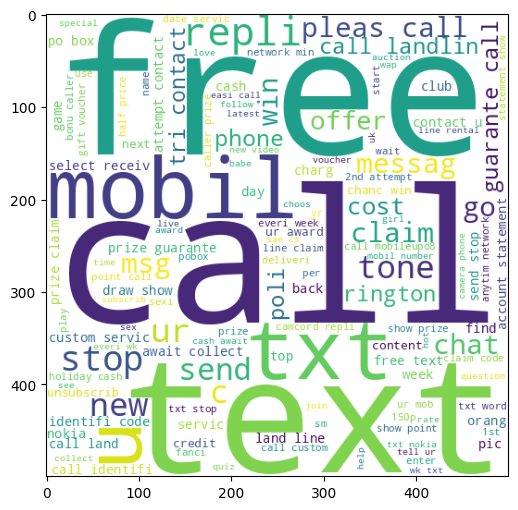

In [54]:
plt.figure(figsize=(15,6)) #for clearity
plt.imshow(spam_wc) #the below given figure shows words which are mostly found in spam messages(eg:call,free,text etc). this was for spam messages

In [55]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=""))

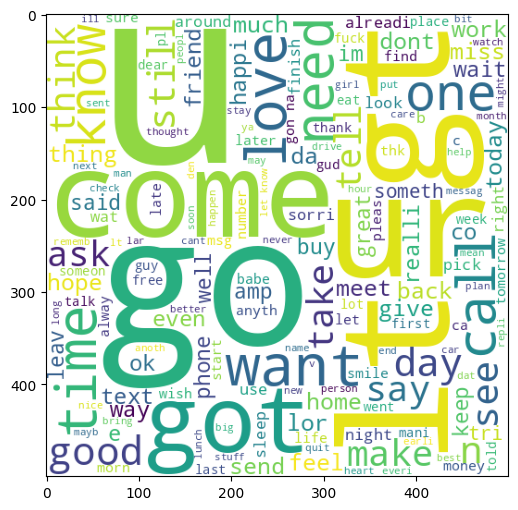

In [56]:
plt.figure(figsize=(15,6)) #for clearity
plt.imshow(ham_wc) #the below given figure shows words which are mostly found in ham messages(eg:come,go,friend,thank,happy,finish etc). this was for ham messages

In [57]:
#let's see top 30 words of ham and spam messages
#we need to write some custom code
df.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [58]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [59]:
len(spam_corpus)

9939

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29] [Text(0, 0, 'call'), Text(1, 0, 'free'), Text(2, 0, '2'), Text(3, 0, 'txt'), Text(4, 0, 'text'), Text(5, 0, 'u'), Text(6, 0, 'ur'), Text(7, 0, 'mobil'), Text(8, 0, 'stop'), Text(9, 0, 'repli'), Text(10, 0, 'claim'), Text(11, 0, '4'), Text(12, 0, 'prize'), Text(13, 0, 'get'), Text(14, 0, 'new'), Text(15, 0, 'servic'), Text(16, 0, 'tone'), Text(17, 0, 'send'), Text(18, 0, 'urgent'), Text(19, 0, 'nokia'), Text(20, 0, 'contact'), Text(21, 0, 'award'), Text(22, 0, 'phone'), Text(23, 0, 'cash'), Text(24, 0, 'pleas'), Text(25, 0, 'week'), Text(26, 0, 'win'), Text(27, 0, 'c'), Text(28, 0, 'collect'), Text(29, 0, 'min')]


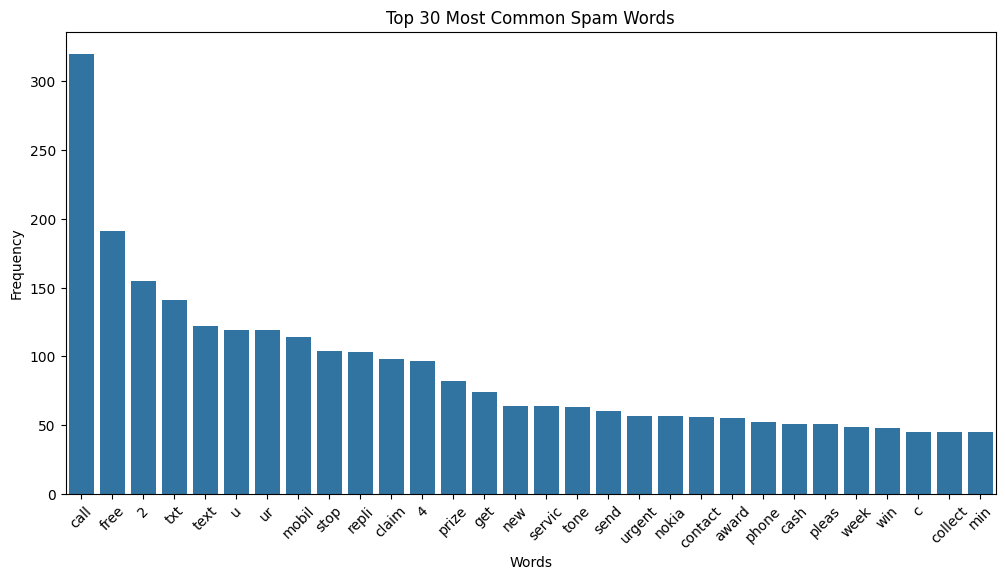

In [60]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.DataFrame(Counter(spam_corpus).most_common(30))  # same as your logic
plt.figure(figsize=(12, 6))
ax=sns.barplot(x=data[0], y=data[1])  # ✅ Use keyword args: x=, y=
plt.xticks(rotation=45)# Optional: rotate x-labels for better visibility

plt.title("Top 30 Most Common Spam Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
tick_values = ax.get_xticks()
tick_labels = ax.get_xticklabels()
print(tick_values, tick_labels)
plt.show() #we are doing so because during interview we need to explain the interpretability and this is only possible when we know the whole scenario

In [61]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [62]:
len(ham_corpus)

35404

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29] [Text(0, 0, 'u'), Text(1, 0, 'go'), Text(2, 0, 'get'), Text(3, 0, 'gt'), Text(4, 0, 'lt'), Text(5, 0, '2'), Text(6, 0, 'come'), Text(7, 0, 'got'), Text(8, 0, 'know'), Text(9, 0, 'like'), Text(10, 0, 'call'), Text(11, 0, 'time'), Text(12, 0, 'ok'), Text(13, 0, 'love'), Text(14, 0, 'good'), Text(15, 0, 'want'), Text(16, 0, 'ur'), Text(17, 0, 'day'), Text(18, 0, 'need'), Text(19, 0, 'one'), Text(20, 0, 'lor'), Text(21, 0, '4'), Text(22, 0, 'home'), Text(23, 0, 'think'), Text(24, 0, 'see'), Text(25, 0, 'take'), Text(26, 0, 'still'), Text(27, 0, 'da'), Text(28, 0, 'tell'), Text(29, 0, 'make')]


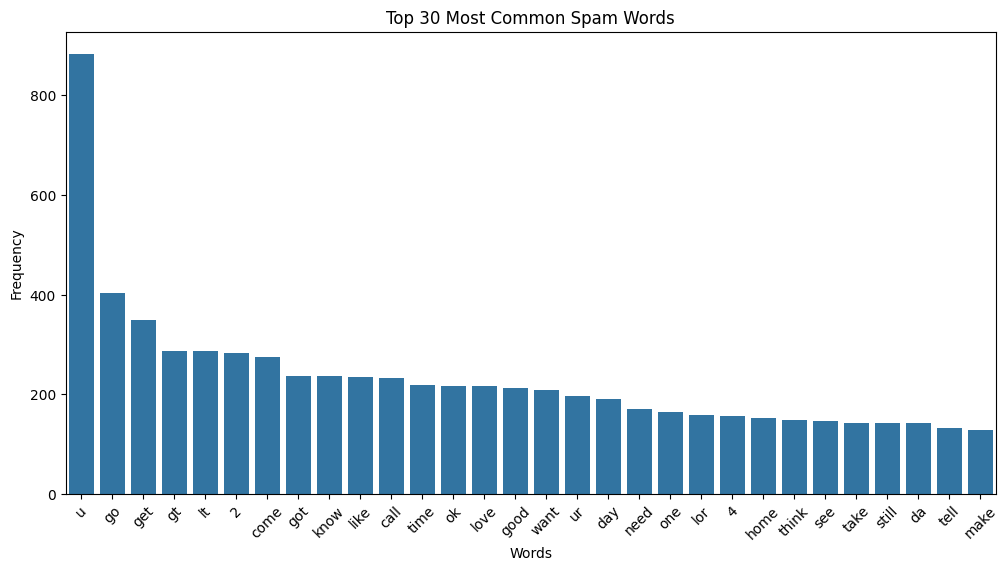

In [63]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.DataFrame(Counter(ham_corpus).most_common(30))  # same as your logic
plt.figure(figsize=(12, 6))
ax=sns.barplot(x=data[0], y=data[1])  # ✅ Use keyword args: x=, y=
plt.xticks(rotation=45)# Optional: rotate x-labels for better visibility

plt.title("Top 30 Most Common Spam Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
tick_values = ax.get_xticks()
tick_labels = ax.get_xticklabels()
print(tick_values, tick_labels)
plt.show()

In [64]:
#now the model we will building will be naive bayes because on textual data, naive bayes performs very well and also we will use other algorithms as well and side by side we will be comparing which gives the best result and we will also apply ensemble learning to see whether we are able to improve the results or not


## 4. Model Building

In [65]:
#any algo like naive bayes and other algos need numerical inputs
df.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [66]:
#first we need to convert text into numeric or vectors/vectorize.
#ways of vectorizing is:
#1. Bag of words(jaha p sbse frequent words ka col banate hai or phir har sms mei check kroge ki vo frequent words kitni baar aare toh jo vo numbers aane lg jate vhi humare vectors ban jate hai
#2.TFIDF

In [67]:
#vectorrize data using bag of words
#input that data into naive bayes to check performance
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [68]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [69]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [70]:
X.shape

(5169, 6708)

In [71]:
y=df['target'].values

In [72]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [75]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [76]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [77]:
#this will give the output of gaussian naive bayes
#and its precision score is .5 which means it is not performing good
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1)) 

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [78]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2)) 

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [79]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3)) 

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [80]:
#now we are using TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

In [81]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [82]:
# X=np.hstack((X,df['num_chars'].values.reshape(-1,1)))

In [83]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler() #not used standard scaler because it gives negative values as well and naive bayes doesnt accept negative values
# X=scaler.fit_transform(X) 
X.shape
#3000 is coming from vectorization and last col is coming from that num_chars col

(5169, 3000)

In [84]:
y=df['target'].values

In [85]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [88]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [89]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [90]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1)) 

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [91]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2)) #now here we see that accuracy thoda sa kam hua but precision score badh gaya like ek bhi false positive nhi dera

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [92]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3)) #no change

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [93]:
#now we have choices that we can either go with multinomial naive baye or bernoulli naive bayes so we decided to go with multinomial naive bayes
#so we have finally chose tfidf and mnb

In [94]:
#so now we are bringing in more machine learning models or unko compare krte hai with mnb setting

In [ ]:
%pip install xgboost


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [97]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
Xgb=XGBClassifier(n_estimators=50,random_state=2)
#made the objects listed above for each

In [98]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':Xgb
}

In [99]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train) #ye function training data ko uss classifier p train kr raha hai
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)

    return accuracy,precision

In [100]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [101]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    try:
        current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
        print(f"For {name}")
        print("Accuracy-", current_accuracy)
        print("Precision-", current_precision)
        accuracy_scores.append(current_accuracy)
        precision_scores.append(current_precision)
    except Exception as e:
        print(f"Error occurred with classifier {name}: {e}")
    # current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    # print("For", name)
    # print("Accuracy-",current_accuracy)
    # print("Precision-",current_precision)
    # accuracy_scores.append(current_accuracy)
    # precision_scores.append(current_precision)

For SVC
Accuracy- 0.9758220502901354
Precision- 0.9747899159663865
For KN
Accuracy- 0.9052224371373307
Precision- 1.0
For NB
Accuracy- 0.9709864603481625
Precision- 1.0
For DT
Accuracy- 0.9294003868471954
Precision- 0.8282828282828283
For LR
Accuracy- 0.9584139264990329
Precision- 0.9702970297029703
For RF
Accuracy- 0.9758220502901354
Precision- 0.9829059829059829
For AdaBoost
Accuracy- 0.9245647969052224
Precision- 0.8488372093023255
For BgC
Accuracy- 0.9584139264990329
Precision- 0.8682170542635659
For ETC
Accuracy- 0.9748549323017408
Precision- 0.9745762711864406
For GBDT
Accuracy- 0.9468085106382979
Precision- 0.9191919191919192
For xgb
Accuracy- 0.9671179883945842
Precision- 0.9482758620689655


In [102]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [103]:
#etc is a variation of randomforestclassifier and is more random than randomforestclassifier
performance_df 

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.948276
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
6,AdaBoost,0.924565,0.848837


In [104]:
performance_df1=pd.melt(performance_df,id_vars="Algorithm")

In [105]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.967118
7,GBDT,Accuracy,0.946809
8,BgC,Accuracy,0.958414
9,AdaBoost,Accuracy,0.924565


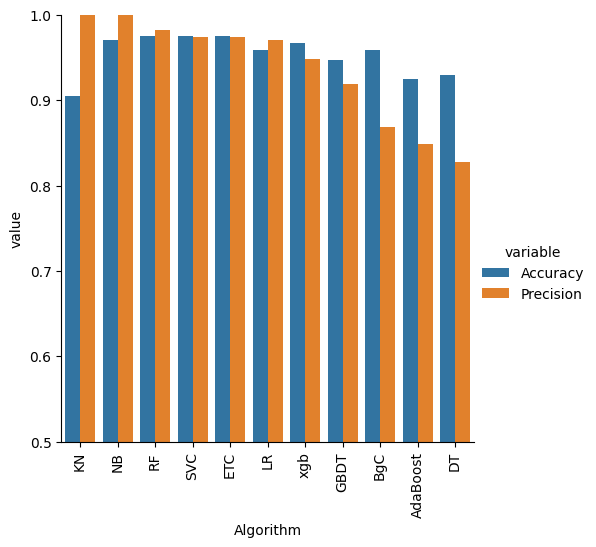

In [106]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [107]:
#model improve
#1.change the max features parameter of tfidf

In [108]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [109]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [110]:
new_df=performance_df.merge(temp_df,on='Algorithm')

In [111]:
new_df_scaled=new_df.merge(temp_df,on='Algorithm')

In [112]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [113]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,xgb,0.967118,0.948276,0.967118,0.948276,0.967118,0.948276,0.967118,0.948276
7,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
8,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
9,AdaBoost,0.924565,0.848837,0.924565,0.848837,0.924565,0.848837,0.924565,0.848837


In [114]:
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [115]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [116]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [117]:
y_pred=voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [118]:
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [119]:
from sklearn.ensemble import StackingClassifier

In [120]:
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [121]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.946969696969697


In [122]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [123]:
import pickle
from sklearn.naive_bayes import MultinomialNB

# assuming X_train and y_train already exist
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Save model
pickle.dump(mnb, open('model.pkl', 'wb'))

# Save vectorizer
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))